In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
import tensorflow

In [3]:
#path = 'D:\\ILBS_14_8_21_Sanjeev\\Work_to_be_Completed_ILBS\\'
path = os.curdir

In [31]:
pid = []
image_file = []
for fname in os.listdir():
    if fname.isdigit():
        #print(fname)  
        pid.append(fname)
        for fname_ins in os.listdir(fname):
            #print(fname_ins)
            image_file.append(fname+'\\'+fname_ins)

In [32]:
df_f = pd.DataFrame(image_file)

In [33]:
df_label = pd.read_excel('HVPG value with CT images.xlsx')

In [34]:
df_label.head()

,ID,Date,HVPG
0,9109,2019-01-30,21
1,19699,2019-02-13,12
2,31322,2019-02-15,17
3,45341,2019-02-13,16
4,49565,2019-02-06,10


In [35]:
labels = []
for row in df_f.values.tolist():
    id_ = int(row[0].split('\\')[-2])
    if id_ == 910:
        id_ = 9109
    for rows in df_label.values.tolist():
        if id_==rows[0]:
            labels.append([row[0],rows[-1]])
           # print(label)
        #break
    #print(row,id_)
    #break

In [36]:
len(labels)

646

In [37]:
len(df_f)

646

In [38]:
df = pd.DataFrame(labels,columns=['path','label'])

In [39]:
df.head()

,path,label
0,00910\IMG-0005-00001.jpg,21
1,00910\IMG-0005-00002.jpg,21
2,00910\IMG-0005-00003.jpg,21
3,00910\IMG-0005-00004.jpg,21
4,00910\IMG-0005-00005.jpg,21


In [40]:
image_path = df['path'][0]
def imread(path):
    image_path = path
    IMG_HEIGHT = IMG_WIDTH =250
    image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    image=np.array(image)
    image = image.astype('float32')
    image /= 255
    return image

In [41]:
df['imarray'] = df['path'].apply(imread)


In [42]:
df.head()

,path,label,imarray
0,00910\IMG-0005-00001.jpg,21,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
1,00910\IMG-0005-00002.jpg,21,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
2,00910\IMG-0005-00003.jpg,21,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
3,00910\IMG-0005-00004.jpg,21,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
4,00910\IMG-0005-00005.jpg,21,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."


In [43]:
df['imarray'].shape

(646,)

In [44]:
from tensorflow import keras
X = df["imarray"].values
y = np.array(df["label"])
y = keras.utils.to_categorical(y)

In [45]:
X_final = np.empty((646,250,250,3))
for i in range(646):
    X_final[i] = X[i]

In [46]:
X = X_final

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_t, y_train_t = X_train, y_train
X_test_t, y_test_t = X_test, y_test


In [49]:
X_train_t = np.expand_dims(X_train_t, axis = 4)
X_test_t = np.expand_dims(X_test_t, axis = 4)


X_test_t.shape

(194, 250, 250, 3, 1)

In [50]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

In [55]:
model = Sequential()
model.add(layers.Flatten(input_shape=(250,250,3,1)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(22, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 187500)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               48000256  
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 22)                1430      
Total params: 48,042,838
Trainable params: 48,042,838
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_t, y_train_t,validation_split=0.1, epochs=10, batch_size=8, verbose=1)

Epoch 1/10
51/51 [==============================] - 31s 233ms/step - loss: 1.6038 - accuracy: 0.9138 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
51/51 [==============================] - 11s 215ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
51/51 [==============================] - 11s 216ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
51/51 [==============================] - 11s 220ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
51/51 [==============================] - 11s 224ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
51/51 [==============================] - 12s 229ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
51/51 [==============================] - 11s 223ms/step - loss: 0.0000e+00 - accuracy: 

In [57]:
y_predict = model.predict(X_test_t)
y_predict_bool = np.argmax(y_predict,axis=1).tolist()
y_test_e = np.argmax(y_test_t,axis=1).tolist()

from sklearn.metrics import precision_score,recall_score,confusion_matrix
print(confusion_matrix(y_test_e,y_predict_bool))

[[115   0]
 [  0  79]]


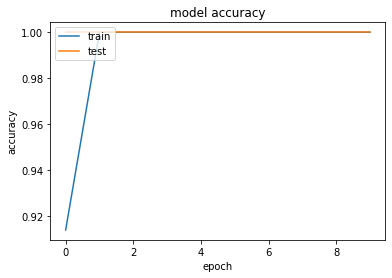

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()